### Correlation analysis : 두 변수간 선형성을 가지고 있는지 분석하는 방법

### Correlation coefficient : 두 변수간의 연관된 정도

### Pearson correlation coefficient(Pearson's r) : Correlation coefficient를 구하기 위한 공식중 하나

In [2]:
# Pandas 라이브러리 사용
import pandas as pd

lst = [[1,2,3,4,5,6,7],
      [10,20,30,40,50,60,70],
      [0,0,0,0,0,0,0],
      [-1,5,-10,24,34,67,52],
      [-1,-2,-3,-4,-5,-6,-7]]

df = pd.DataFrame(lst).T
cor = df.corr(method="pearson")

print(cor)

# lst[0] & lst[1] ==> perfect positive correlation
# lst[0] & lst[3] ==> strong positive correlation

          0         1   2         3         4
0  1.000000  1.000000 NaN  0.885194 -1.000000
1  1.000000  1.000000 NaN  0.885194 -1.000000
2       NaN       NaN NaN       NaN       NaN
3  0.885194  0.885194 NaN  1.000000 -0.885194
4 -1.000000 -1.000000 NaN -0.885194  1.000000


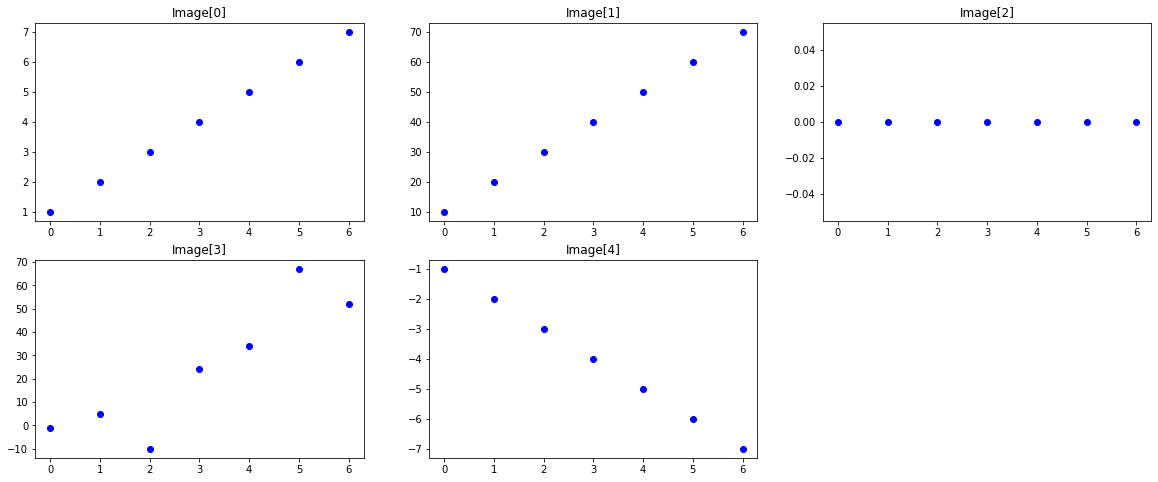

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))

plt.subplot(231)
plt.title('Image[0]')
plt.plot(lst[0],'bo')

plt.subplot(232)
plt.title('Image[1]')
plt.plot(lst[1],'bo')

plt.subplot(233)
plt.title('Image[2]')
plt.plot(lst[2],'bo')

plt.subplot(234)
plt.title('Image[3]')
plt.plot(lst[3],'bo')

plt.subplot(235)
plt.title('Image[4]')
plt.plot(lst[4],'bo')

In [16]:
import math
import numpy as np

In [26]:
#pearson correlation coefficient
def pearson(lst0, lst1):
    lst0 = np.array(lst0)
    lst1 = np.array(lst1)
    lstSub = lst0 - lst1
    r = (np.sum(lstSub)) / (math.sqrt(np.sum(lstSub)**2))
    return r

In [67]:
#잔존치 예시
#Pred , 정상 , alert
l0 = [8,15,20,24,28,31]
l1 = [7,16,20,22,28,30]
l2 = [5,10,18,30,15,28]

#임플란트 예시
#Pred , 정상 , alert
l01 = [10,8,3,4,0,1]
l11 = [10,8,2,5,1,0]
l21 = [15,10,8,2,2,1]

#결손치 예시
#Pred , 정상 , alert
l02 = [14,9,9,4,4,0]
l12 = [15,8,10,5,3,2]
l22 = [12,12,6,0,15,3]

df_residual = pd.DataFrame((l0,l1,l2)).T
cor_residual = df_residual.corr(method ='pearson')

df_implant = pd.DataFrame((l01,l11,l21)).T
cor_implant = df_implant.corr(method ='pearson')

df_loss = pd.DataFrame((l02,l12,l22)).T
cor_loss = df_loss.corr(method ='pearson')

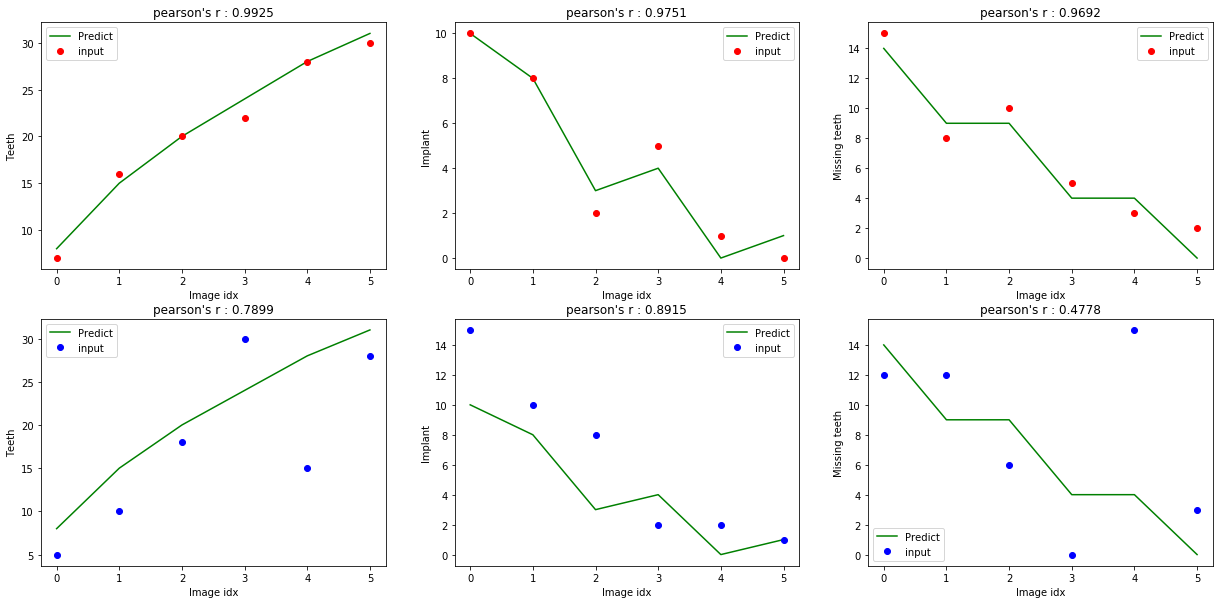

In [71]:
plt.figure(figsize=(21,10))
plt.subplot(231)
plt.title(("pearson's r : %0.4f" %cor_residual[0][1]))
plt.xlabel("Image idx")
plt.ylabel("Teeth")
plt.plot(l0,'g',label ="Predict")
plt.plot(l1,'ro',label = "input")
plt.legend()

plt.subplot(234)
plt.title(("pearson's r : %0.4f" %cor_residual[0][2]))
plt.xlabel("Image idx")
plt.ylabel("Teeth")
plt.plot(l0,'g',label ="Predict")
plt.plot(l2,'bo',label = "input")
plt.legend()
#plt.show()

plt.subplot(232)
plt.title(("pearson's r : %0.4f" %cor_implant[0][1]))
plt.xlabel("Image idx")
plt.ylabel("Implant")
plt.plot(l01,'g',label ="Predict")
plt.plot(l11,'ro',label = "input")
plt.legend()

plt.subplot(235)
plt.title(("pearson's r : %0.4f" %cor_implant[0][2]))
plt.xlabel("Image idx")
plt.ylabel("Implant")
plt.plot(l01,'g',label ="Predict")
plt.plot(l21,'bo',label = "input")
plt.legend()
#plt.show()

plt.subplot(233)
plt.title(("pearson's r : %0.4f" %cor_loss[0][1]))
plt.xlabel("Image idx")
plt.ylabel("Missing teeth")
plt.plot(l02,'g',label ="Predict")
plt.plot(l12,'ro',label = "input")
plt.legend()

plt.subplot(236)
plt.title(("pearson's r : %0.4f" %cor_loss[0][2]))
plt.xlabel("Image idx")
plt.ylabel("Missing teeth")
plt.plot(l02,'g',label ="Predict")
plt.plot(l22,'bo',label = "input")
plt.legend()
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\mmmil\AppData\Local\Continuum\miniconda3\envs\tf2\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
prediction = [8,15,20,24,28,30,31]
right =      [7,16,20,22,28,29,30]
wrong =      [5,15,20,30,15,27,28]

right_df = pd.DataFrame((prediction, right)).T
wrong_df = pd.DataFrame((prediction, wrong)).T

right_corr = right_df.corr(method = 'pearson')
wrong_corr = wrong_df.corr(method = 'pearson')

print(wrong_corr)
wrong_df

          0         1
0  1.000000  0.789292
1  0.789292  1.000000


,0,1
0,8,5
1,15,15
2,20,20
3,24,30
4,28,15
5,30,27
6,31,28


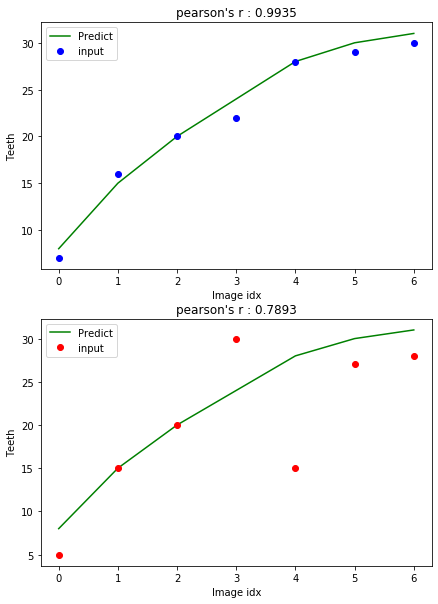

In [7]:
plt.figure(figsize=(7,10))
plt.subplot(211)
plt.title(("pearson's r : %0.4f" %right_corr[0][1]))
plt.xlabel("Image idx")
plt.ylabel("Teeth")
plt.plot(prediction,'g',label ="Predict")
plt.plot(right,'bo',label = "input")
plt.legend()

plt.subplot(212)
plt.title(("pearson's r : %0.4f" %wrong_corr[0][1]))
plt.xlabel("Image idx")
plt.ylabel("Teeth")
plt.plot(prediction,'g',label ="Predict")
plt.plot(wrong,'ro',label = "input")
plt.legend()